In [131]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [97]:
stock_price=yf.download(tickers='AAPL',interval='1m',period='max')

[*********************100%%**********************]  1 of 1 completed


In [98]:
stock_price

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-10-11 09:30:00-04:00,178.199997,178.350006,178.059998,178.339996,178.339996,1394009
2023-10-11 09:31:00-04:00,178.339996,178.509995,178.199997,178.449997,178.449997,278241
2023-10-11 09:32:00-04:00,178.445007,178.550003,178.210098,178.389999,178.389999,197246
2023-10-11 09:33:00-04:00,178.389999,178.639999,178.330002,178.500000,178.500000,189953
2023-10-11 09:34:00-04:00,178.482605,178.500000,178.259995,178.389999,178.389999,152034
...,...,...,...,...,...,...
2023-10-17 15:55:00-04:00,177.104996,177.169998,177.000000,177.070007,177.070007,417162
2023-10-17 15:56:00-04:00,177.070007,177.179993,176.850006,176.910004,176.910004,326626
2023-10-17 15:57:00-04:00,176.910004,177.020004,176.904999,177.009995,177.009995,290529


In [99]:
# Get the options data for a stock
stock = yf.Ticker("AAPL")
options_chain = stock.option_chain()
options_chain_calls=pd.DataFrame(options_chain.calls)
options_chain_puts=pd.DataFrame(options_chain.puts)


In [100]:
stock.options

('2023-10-20',
 '2023-10-27',
 '2023-11-03',
 '2023-11-10',
 '2023-11-17',
 '2023-11-24',
 '2023-12-01',
 '2023-12-15',
 '2024-01-19',
 '2024-02-16',
 '2024-03-15',
 '2024-04-19',
 '2024-06-21',
 '2024-09-20',
 '2024-12-20',
 '2025-01-17',
 '2025-06-20',
 '2025-12-19',
 '2026-01-16')

Options Max Pain From Investopedia.com
To find the max pain price, for each in-the-money strike price for both puts and calls:

1. Calculate the difference between the stock price and the strike price.

2. Multiply that difference by the open interest at that strike.

3. Add the dollar value for the put and call at that strike.

4. Repeat steps 1-3 for each strike price. Identify the highest value strike price as the max pain price.

In [101]:
from datetime import datetime
ticker='TSLA'
stock=yf.download(tickers=ticker,period='max',interval='1m')

[*********************100%%**********************]  1 of 1 completed


In [102]:
all_data

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Expiry,pain
0,TSLA231020C00005000,2023-10-16 15:51:02+00:00,5.0,247.12,0.0,0.00,0.0,0.0,3.0,309.0,0.000010,True,REGULAR,USD,231020,0.0
1,TSLA231020C00010000,2023-10-17 17:21:54+00:00,10.0,244.88,0.0,0.00,0.0,0.0,4.0,31.0,0.000010,True,REGULAR,USD,231020,0.0
2,TSLA231020C00015000,2023-10-17 17:31:42+00:00,15.0,239.20,0.0,0.00,0.0,0.0,8.0,37.0,0.000010,True,REGULAR,USD,231020,0.0
3,TSLA231020C00020000,2023-10-10 16:28:30+00:00,20.0,246.20,0.0,0.00,0.0,0.0,2.0,63.0,0.000010,True,REGULAR,USD,231020,0.0
4,TSLA231020C00025000,2023-09-11 15:40:04+00:00,25.0,246.01,237.6,238.75,0.0,0.0,3.0,30.0,23.544925,True,REGULAR,USD,231020,7128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,TSLA260116P00420000,2023-10-17 13:53:42+00:00,420.0,182.31,0.0,0.00,0.0,0.0,50.0,47.0,0.000010,True,REGULAR,USD,260116,0.0
50,TSLA260116P00450000,2023-10-13 17:24:33+00:00,450.0,205.00,0.0,0.00,0.0,0.0,10.0,24.0,0.000010,True,REGULAR,USD,260116,0.0
51,TSLA260116P00480000,2023-09-27 15:45:03+00:00,480.0,241.11,0.0,0.00,0.0,0.0,1.0,2.0,0.000010,True,REGULAR,USD,260116,0.0
52,TSLA260116P00500000,2023-10-17 13:50:48+00:00,500.0,253.20,0.0,0.00,0.0,0.0,2.0,124.0,0.000010,True,REGULAR,USD,260116,0.0


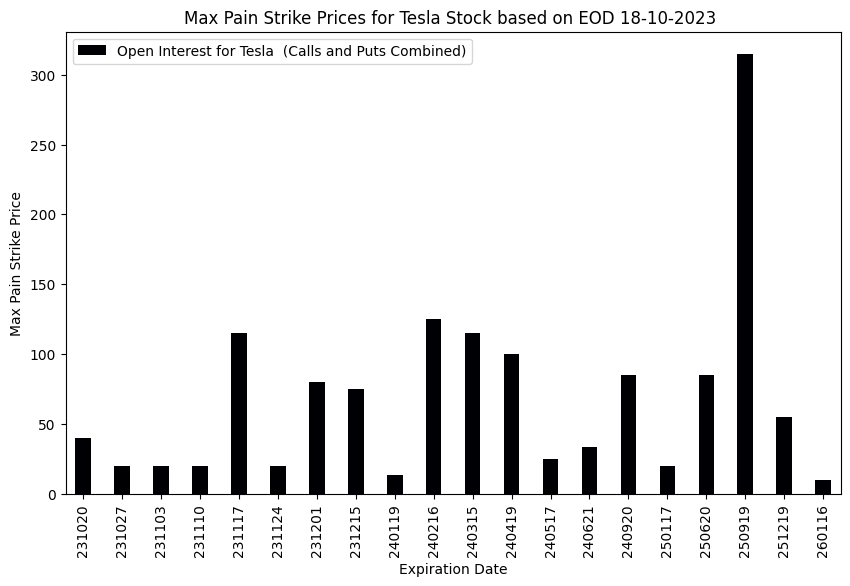

In [103]:
# Plot the Max Pain strike prices with expiration dates
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the Max Pain strike prices
max_pain.plot(kind='bar', ax=ax, width=0.4,cmap='inferno')

# Customize the plot
ax.set_ylabel('Max Pain Strike Price')
ax.set_xlabel('Expiration Date')
ax.set_title('Max Pain Strike Prices for Tesla Stock based on EOD 18-10-2023 ')
ax.legend(['Open Interest for Tesla  (Calls and Puts Combined)'])

plt.show()

In [104]:
all_data

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Expiry,pain
0,TSLA231020C00005000,2023-10-16 15:51:02+00:00,5.0,247.12,0.0,0.00,0.0,0.0,3.0,309.0,0.000010,True,REGULAR,USD,231020,0.0
1,TSLA231020C00010000,2023-10-17 17:21:54+00:00,10.0,244.88,0.0,0.00,0.0,0.0,4.0,31.0,0.000010,True,REGULAR,USD,231020,0.0
2,TSLA231020C00015000,2023-10-17 17:31:42+00:00,15.0,239.20,0.0,0.00,0.0,0.0,8.0,37.0,0.000010,True,REGULAR,USD,231020,0.0
3,TSLA231020C00020000,2023-10-10 16:28:30+00:00,20.0,246.20,0.0,0.00,0.0,0.0,2.0,63.0,0.000010,True,REGULAR,USD,231020,0.0
4,TSLA231020C00025000,2023-09-11 15:40:04+00:00,25.0,246.01,237.6,238.75,0.0,0.0,3.0,30.0,23.544925,True,REGULAR,USD,231020,7128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,TSLA260116P00420000,2023-10-17 13:53:42+00:00,420.0,182.31,0.0,0.00,0.0,0.0,50.0,47.0,0.000010,True,REGULAR,USD,260116,0.0
50,TSLA260116P00450000,2023-10-13 17:24:33+00:00,450.0,205.00,0.0,0.00,0.0,0.0,10.0,24.0,0.000010,True,REGULAR,USD,260116,0.0
51,TSLA260116P00480000,2023-09-27 15:45:03+00:00,480.0,241.11,0.0,0.00,0.0,0.0,1.0,2.0,0.000010,True,REGULAR,USD,260116,0.0
52,TSLA260116P00500000,2023-10-17 13:50:48+00:00,500.0,253.20,0.0,0.00,0.0,0.0,2.0,124.0,0.000010,True,REGULAR,USD,260116,0.0


In [107]:
all_data['Type']=np.where(all_data['contractSymbol'].str.contains('C'),'C','P')

In [108]:
all_data

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Expiry,pain,Type
0,TSLA231020C00005000,2023-10-16 15:51:02+00:00,5.0,247.12,0.0,0.00,0.0,0.0,3.0,309.0,0.000010,True,REGULAR,USD,231020,0.0,C
1,TSLA231020C00010000,2023-10-17 17:21:54+00:00,10.0,244.88,0.0,0.00,0.0,0.0,4.0,31.0,0.000010,True,REGULAR,USD,231020,0.0,C
2,TSLA231020C00015000,2023-10-17 17:31:42+00:00,15.0,239.20,0.0,0.00,0.0,0.0,8.0,37.0,0.000010,True,REGULAR,USD,231020,0.0,C
3,TSLA231020C00020000,2023-10-10 16:28:30+00:00,20.0,246.20,0.0,0.00,0.0,0.0,2.0,63.0,0.000010,True,REGULAR,USD,231020,0.0,C
4,TSLA231020C00025000,2023-09-11 15:40:04+00:00,25.0,246.01,237.6,238.75,0.0,0.0,3.0,30.0,23.544925,True,REGULAR,USD,231020,7128.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,TSLA260116P00420000,2023-10-17 13:53:42+00:00,420.0,182.31,0.0,0.00,0.0,0.0,50.0,47.0,0.000010,True,REGULAR,USD,260116,0.0,P
50,TSLA260116P00450000,2023-10-13 17:24:33+00:00,450.0,205.00,0.0,0.00,0.0,0.0,10.0,24.0,0.000010,True,REGULAR,USD,260116,0.0,P
51,TSLA260116P00480000,2023-09-27 15:45:03+00:00,480.0,241.11,0.0,0.00,0.0,0.0,1.0,2.0,0.000010,True,REGULAR,USD,260116,0.0,P
52,TSLA260116P00500000,2023-10-17 13:50:48+00:00,500.0,253.20,0.0,0.00,0.0,0.0,2.0,124.0,0.000010,True,REGULAR,USD,260116,0.0,P


In [113]:
all_data[(all_data['Type']=='C') & (all_data['Expiry']=='231020')]

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Expiry,pain,Type
0,TSLA231020C00005000,2023-10-16 15:51:02+00:00,5.0,247.12,0.0,0.00,0.0,0.0,3.0,309.0,0.000010,True,REGULAR,USD,231020,0.0,C
1,TSLA231020C00010000,2023-10-17 17:21:54+00:00,10.0,244.88,0.0,0.00,0.0,0.0,4.0,31.0,0.000010,True,REGULAR,USD,231020,0.0,C
2,TSLA231020C00015000,2023-10-17 17:31:42+00:00,15.0,239.20,0.0,0.00,0.0,0.0,8.0,37.0,0.000010,True,REGULAR,USD,231020,0.0,C
3,TSLA231020C00020000,2023-10-10 16:28:30+00:00,20.0,246.20,0.0,0.00,0.0,0.0,2.0,63.0,0.000010,True,REGULAR,USD,231020,0.0,C
4,TSLA231020C00025000,2023-09-11 15:40:04+00:00,25.0,246.01,237.6,238.75,0.0,0.0,3.0,30.0,23.544925,True,REGULAR,USD,231020,7128.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,TSLA231020C00520000,2023-10-06 15:31:44+00:00,520.0,0.01,0.0,0.00,0.0,0.0,3.0,15114.0,0.500005,False,REGULAR,USD,231020,0.0,C
128,TSLA231020C00530000,2023-10-11 15:17:16+00:00,530.0,0.01,0.0,0.00,0.0,0.0,5.0,3258.0,0.500005,False,REGULAR,USD,231020,0.0,C
129,TSLA231020C00540000,2023-10-06 13:32:44+00:00,540.0,0.01,0.0,0.00,0.0,0.0,3.0,4302.0,1.000005,False,REGULAR,USD,231020,0.0,C
130,TSLA231020C00550000,2023-10-12 13:30:03+00:00,550.0,0.01,0.0,0.00,0.0,0.0,20.0,2598.0,0.500005,False,REGULAR,USD,231020,0.0,C


In [127]:
df=all_data[['strike','impliedVolatility']]

<Axes: xlabel='strike', ylabel='impliedVolatility'>

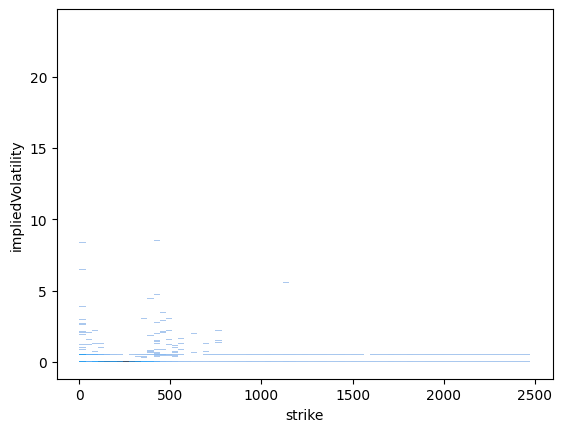

In [140]:
sns.histplot(x=df['strike'],y=df['impliedVolatility'],common_bins=False,element='Bars')